In [256]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import tree as trr
import cart

In [257]:
df = pd.read_csv("CarPrice_Assignment.csv")
df = df[['curbweight', 'horsepower', 'price']]
df

,curbweight,horsepower,price
0,2548,111,13495.0
1,2548,111,16500.0
2,2823,154,16500.0
3,2337,102,13950.0
4,2824,115,17450.0
...,...,...,...
200,2952,114,16845.0
201,3049,160,19045.0
202,3012,134,21485.0
203,3217,106,22470.0


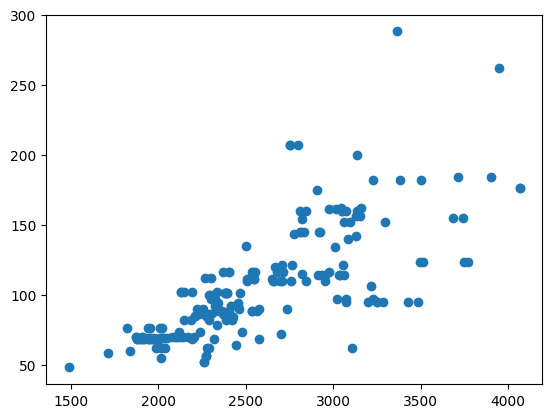

In [258]:
plt.scatter(df['curbweight'], df['horsepower'])
plt.show()

In [259]:
train_df = df.sample(frac = 0.75)
test_df = df.drop(train_df.index)

In [260]:
tree = cart.cart_tree(['curbweight', 'horsepower'], 'price')
tree.train_tree(train_df, 2000)

{'var': 'curbweight',
 'val': 1488,
 'left': nan,
 'right': {'var': 'curbweight',
  'val': 3505,
  'left': {'var': 'horsepower',
   'val': 207,
   'left': {'var': 'curbweight',
    'val': 2094,
    'left': {'var': 'horsepower',
     'val': 62,
     'left': {'var': 'curbweight',
      'val': 1837,
      'left': 5151.0,
      'right': 5399.0},
     'right': {'var': 'horsepower',
      'val': 76,
      'left': {'var': 'curbweight',
       'val': 1905,
       'left': {'var': 'curbweight',
        'val': 1874,
        'left': nan,
        'right': {'var': 'curbweight',
         'val': 1889,
         'left': {'var': 'curbweight',
          'val': 1876,
          'left': 6295.0,
          'right': {'var': 'horsepower',
           'val': 68,
           'left': nan,
           'right': 5974.5}},
         'right': {'var': 'curbweight',
          'val': 1900,
          'left': 5499.0,
          'right': 6095.0}}},
       'right': {'var': 'curbweight',
        'val': 1945,
        'left': {'var': 

In [261]:
test = tree.test_tree(test_df)
test

,curbweight,horsepower,price,estimated_price
0,2548,111,13495.0,16500.0
2,2823,154,16500.0,12964.0
7,2954,110,18920.0,16845.0
10,2395,101,16430.0,11972.5
11,2395,101,16925.0,11972.5
20,1909,70,6575.0,6795.0
30,1713,58,6479.0,5151.0
36,2024,76,7295.0,7295.0
39,2304,86,8845.0,9095.0
40,2372,86,10295.0,6989.0


In [262]:
mean_squared_error(test['price'], test['estimated_price'])

6686571.299019608

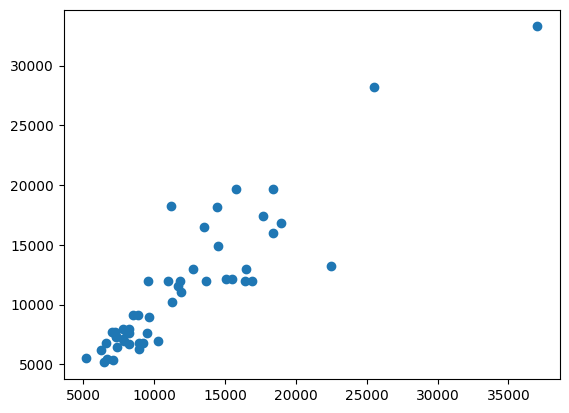

In [263]:
plt.scatter(test['price'], test['estimated_price'])
plt.show()

In [264]:
clf = trr.DecisionTreeRegressor()
clf = clf.fit(train_df[['curbweight', 'horsepower']], train_df['price'])
pred = clf.predict(test_df[['curbweight', 'horsepower']])

In [265]:
mean_squared_error(test_df['price'], pred)

10261190.700980391

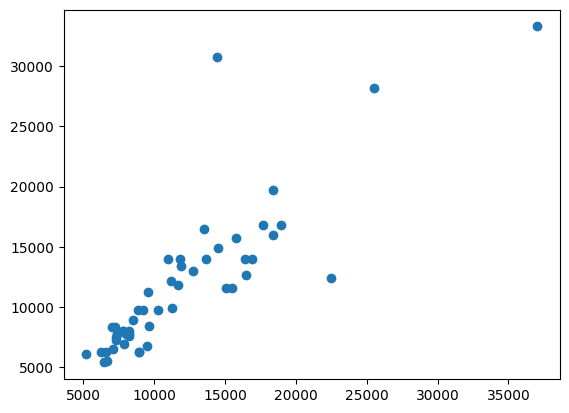

In [266]:
plt.scatter(test_df['price'], pred)
plt.show()

In [267]:
test.to_excel("results.xlsx")

In [268]:
tree.tree

{'var': 'curbweight',
 'val': 1488,
 'left': nan,
 'right': {'var': 'curbweight',
  'val': 3505,
  'left': {'var': 'horsepower',
   'val': 207,
   'left': {'var': 'curbweight',
    'val': 2094,
    'left': {'var': 'horsepower',
     'val': 62,
     'left': {'var': 'curbweight',
      'val': 1837,
      'left': 5151.0,
      'right': 5399.0},
     'right': {'var': 'horsepower',
      'val': 76,
      'left': {'var': 'curbweight',
       'val': 1905,
       'left': {'var': 'curbweight',
        'val': 1874,
        'left': nan,
        'right': {'var': 'curbweight',
         'val': 1889,
         'left': {'var': 'curbweight',
          'val': 1876,
          'left': 6295.0,
          'right': {'var': 'horsepower',
           'val': 68,
           'left': nan,
           'right': 5974.5}},
         'right': {'var': 'curbweight',
          'val': 1900,
          'left': 5499.0,
          'right': 6095.0}}},
       'right': {'var': 'curbweight',
        'val': 1945,
        'left': {'var': 